In [ ]:
!pip install py-hyperneat

In [3]:
from neat.population import Population
from neat.neural_network import NeuralNetwork
from neat.genome import Genome, Phenotype
from neat.genes import NodeGene, ConnectionGene, NodeType
from neat.neat import Neat, TrainTask
from neat.activation_functions import ActivationFunction

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Select tanh function to initialize activations
tanh_function = ActivationFunction().functions['TANH']

# 10 layers
num_layers = 10

# Node genes
input_node_0 = NodeGene(0, NodeType.INPUT, tanh_function, 0)
input_node_1 = NodeGene(1, NodeType.INPUT, tanh_function, 0)
output_node = NodeGene(2, NodeType.OUTPUT, tanh_function, num_layers - 1)

nodes = [input_node_0, input_node_1, output_node]

In [5]:
# Connection genes: innovation, in node, out node, weight, enable?, in node layer, out node layer
connection_0 = ConnectionGene(0, input_node_0.gene_id, output_node.gene_id, 0.1, True, input_node_0.layer, output_node.layer)
connection_1 = ConnectionGene(1, input_node_1.gene_id, output_node.gene_id, 0.2, True, input_node_1.layer, output_node.layer)

connections = [connection_0, connection_1]

In [6]:
# Create seed genome, specify connections weight range
weights_range = (-8.0, 8.0)
genome = Genome(weights_range)

# Assemble genome from nodes and connections info. 
# Need to specify the type of phenotype to construct and number of layers
genome.create_genome_from_genes(nodes, connections, Phenotype.LAYERED_NETWORK, num_layers)

In [7]:
# Create new population
pop = Population()

# Set hyperparameters of evolution
pop.params.population_max = 100
pop.params.distance_coeff_1 = 0.6
pop.params.distance_coeff_2 = 0.6
pop.params.distance_coeff_3 = 0.06
pop.params.distance_threshold = 9.0 #Adjusted while training
pop.params.small_genome_coeff = 8
pop.params.no_crossover_offspring = 0.85

pop.params.survival_selection = True
pop.params.allow_clones = True
pop.params.survival_threshold = 0.4
pop.params.elite_offspring_param = 0.1

pop.params.min_species = 4
pop.params.max_species = 10

# Set probabilities of interspecies mating and mutations
# Interspecies probability of mate
pop.prob.interspecies_mating = 0.2

# Small organisms mutation probabilities
pop.prob.sp_new_node = 0.001
pop.prob.sp_new_connection = 0.002

# Large organisms mutation probabilities
pop.prob.lp_new_node = 0.0003
pop.prob.lp_new_connection = 0.0004

# Mutation weights and activation probabilities
pop.prob.mutation_weight = 0.1
pop.prob.mutate_activation = 0.05

# Create population of organisms from the seed genome
pop.start_population(genome)

In [9]:
# Define a fitness function.
# Current function intend to solve XOR problem, given the four possible inputs
def fitness(input_data, net):
    error = 0.0
    outputs = []

    logic = input_data[0]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[1]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(1 - net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[2]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(1 - net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[3]
    net.input(logic)
    net.activate_net()
    error += math.fabs(net.output()[0])
    outputs.append(net.output()[0])

    return math.pow(4 - error, 2)

In [10]:
# Create an instance of Neat algorithm, 100 generations
num_generations = 100
evolution = Neat(fitness_eval=fitness, train_task=TrainTask.PREDICTION, max_generation=num_generations)

# Set population to evolutionary algorithm. Limit activation functions to tanh for this example
evolution.pop = pop
evolution.pop.activation_set.use_only_tanh()

In [11]:
# Define input sets to fit with fitness function
xor_eval = [[0, 0], [0, 1], [1, 0], [1, 1]]

# Run training
evolution.set_multi_input(xor_eval)
evolution.run()

Generation #0: species = 1, champion_fitness = 6.469567, avg_generation_fitness = 2.806776
Generation #1: species = 1, champion_fitness = 8.604214, avg_generation_fitness = 3.565405
Generation #2: species = 1, champion_fitness = 8.622006, avg_generation_fitness = 4.542124
Generation #3: species = 1, champion_fitness = 8.816316, avg_generation_fitness = 5.163574
Generation #4: species = 1, champion_fitness = 8.962952, avg_generation_fitness = 6.449841
Generation #5: species = 1, champion_fitness = 8.995030, avg_generation_fitness = 6.906886
Generation #6: species = 1, champion_fitness = 10.083368, avg_generation_fitness = 7.237193
Generation #7: species = 1, champion_fitness = 10.083368, avg_generation_fitness = 8.161533
Generation #8: species = 1, champion_fitness = 14.385688, avg_generation_fitness = 7.474459
Generation #9: species = 1, champion_fitness = 14.385688, avg_generation_fitness = 7.859943
Generation #10: species = 1, champion_fitness = 14.385688, avg_generation_fitness = 8.

Generation #89: species = 7, champion_fitness = 15.812517, avg_generation_fitness = 8.155740
Generation #90: species = 7, champion_fitness = 15.812517, avg_generation_fitness = 7.525219
Generation #91: species = 7, champion_fitness = 15.812517, avg_generation_fitness = 8.003571
Generation #92: species = 7, champion_fitness = 15.812517, avg_generation_fitness = 8.411853
Generation #93: species = 7, champion_fitness = 15.812517, avg_generation_fitness = 8.208890
Generation #94: species = 7, champion_fitness = 15.812517, avg_generation_fitness = 7.952668
Generation #95: species = 7, champion_fitness = 15.812517, avg_generation_fitness = 7.553909
Generation #96: species = 7, champion_fitness = 15.812517, avg_generation_fitness = 7.737228
Generation #97: species = 8, champion_fitness = 15.812517, avg_generation_fitness = 8.109673
Generation #98: species = 8, champion_fitness = 15.812517, avg_generation_fitness = 7.453962
Generation #99: species = 8, champion_fitness = 15.812517, avg_generat

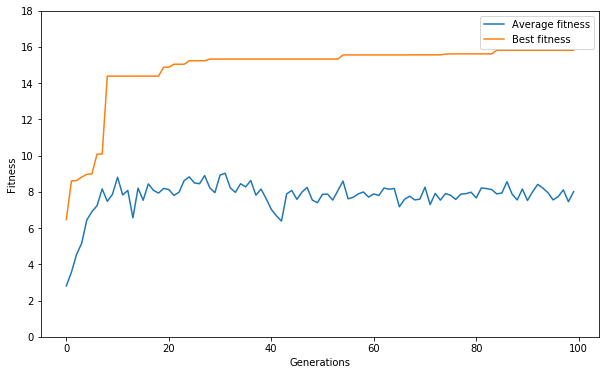

In [12]:
generations = np.linspace(0, 99, 100)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(generations, evolution.historical_avg_fitness, label='Average fitness')
ax.plot(generations, evolution.historical_best_fitness, label='Best fitness') # primer gráfico (primera sub-figura)
ax.set_ylabel('Fitness')
ax.set_xlabel('Generations')
ax.set_ylim(0, 18)
leg = ax.legend();